In [19]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-bright')
plt.rcParams['figure.figsize'] = [15, 5]

In [20]:
def bisection(func, interval, tol, max_iter = 100):
    low = interval[0]
    high = interval[1]
    if np.sign(func(low)) == np.sign(func(high)):
        raise ValueError("No root in interval [%s, %s]"%(low, hgigh))
    
    midpoint = np.mean([low, high])
    history = []
    while ((high - low) / 2) >= tol and len(history) < max_iter:
        # split the interval
        midpoint = np.mean([low, high])
        
        if func(midpoint) == 0:
            break
            
        # Figure out which side to go to
        if np.sign(func(midpoint)) != np.sign(func(low)):
            high = midpoint
        else:
            low = midpoint
            
        history.append(midpoint)
    
    return midpoint, history

# Problem 3a

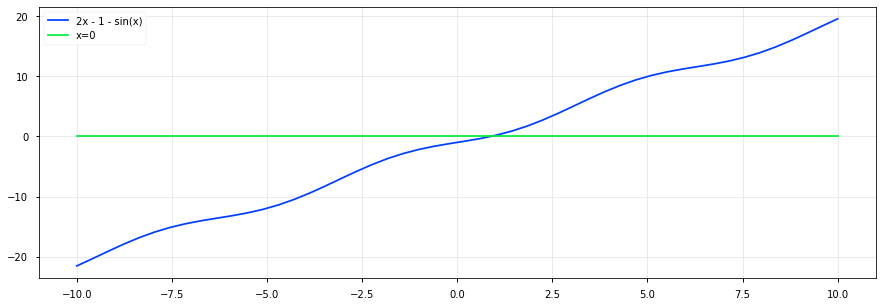

In [32]:
f = lambda x : 2*x - 1 - np.sin(x)
x = np.linspace(-10, 10)
plt.plot(x, f(x))
plt.grid(alpha=0.25)
plt.plot(x, 0*x)
_ = plt.legend(["2x - 1 - sin(x)", "x=0"])

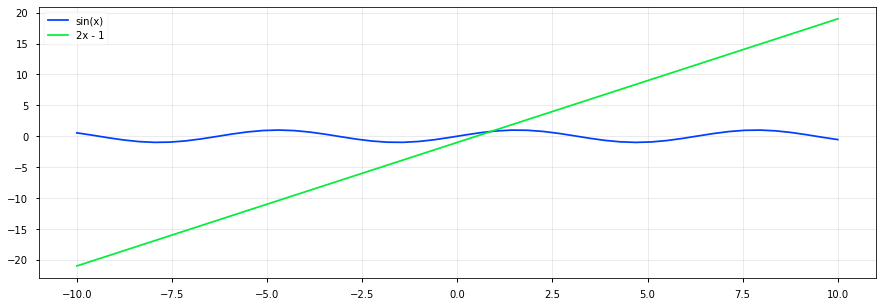

In [30]:
x = np.linspace(-10, 10)
plt.plot(x, np.sin(x))
plt.plot(x, 2*x - 1)
plt.grid(alpha=0.25)
_ = plt.legend(["sin(x)", "2x - 1"])

In [5]:
root, history = bisection(f, [0,2], tol = 1e-8)

for i, root in enumerate(history):
    print("Iter {:2d}, r={:.16f}".format(i,root))

Iter  0, r=1.0000000000000000
Iter  1, r=0.5000000000000000
Iter  2, r=0.7500000000000000
Iter  3, r=0.8750000000000000
Iter  4, r=0.9375000000000000
Iter  5, r=0.9062500000000000
Iter  6, r=0.8906250000000000
Iter  7, r=0.8828125000000000
Iter  8, r=0.8867187500000000
Iter  9, r=0.8886718750000000
Iter 10, r=0.8876953125000000
Iter 11, r=0.8881835937500000
Iter 12, r=0.8879394531250000
Iter 13, r=0.8878173828125000
Iter 14, r=0.8878784179687500
Iter 15, r=0.8878479003906250
Iter 16, r=0.8878631591796875
Iter 17, r=0.8878555297851562
Iter 18, r=0.8878593444824219
Iter 19, r=0.8878612518310547
Iter 20, r=0.8878622055053711
Iter 21, r=0.8878626823425293
Iter 22, r=0.8878624439239502
Iter 23, r=0.8878623247146606
Iter 24, r=0.8878622651100159
Iter 25, r=0.8878622353076935
Iter 26, r=0.8878622204065323


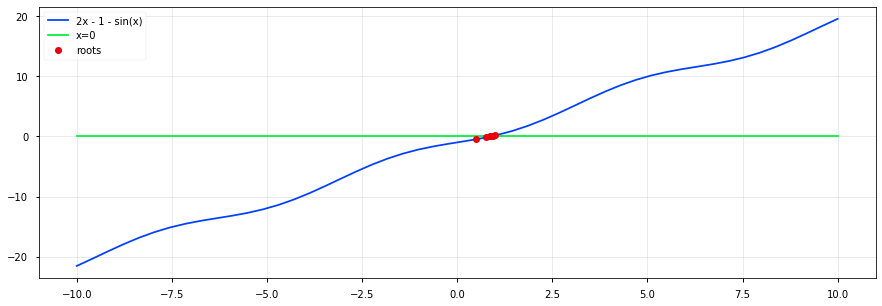

In [35]:
plt.plot(x, f(x))
plt.grid(alpha=0.25)
plt.plot(x, 0*x)
plt.plot(history, f(np.array(history)), 'o')
_ = plt.legend(["2x - 1 - sin(x)", "x=0", "roots"])

# Probelm 3d

In [6]:
compact = lambda x : (x-5)**9
poly = lambda x : np.polyval(np.poly([5]*9), x)
root_compact, history_compact = bisection(compact, (4.82, 5.2), tol=1e-4, max_iter=20)
root_poly, history_poly = bisection(poly, (4.82, 5.2), tol=1e-4, max_iter=20)

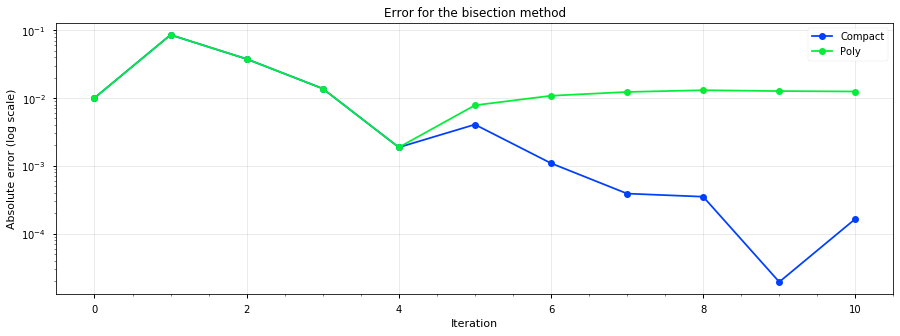

In [23]:
# Plot absolute error
true_answer = 5
fig, ax = plt.subplots()
plt.plot(abs(np.array(history_compact) - true_answer) ,'o-')
plt.plot(abs(np.array(history_poly) - true_answer) ,'o-')
ax.set_yscale('log')
ax.grid(alpha=0.25)
ax.minorticks_on()
ax.set_ylabel("Absolute error (log scale)");
ax.set_xlabel("Iteration");
ax.set_title("Error for the bisection method");

_ = plt.legend(["Compact", "Poly"])

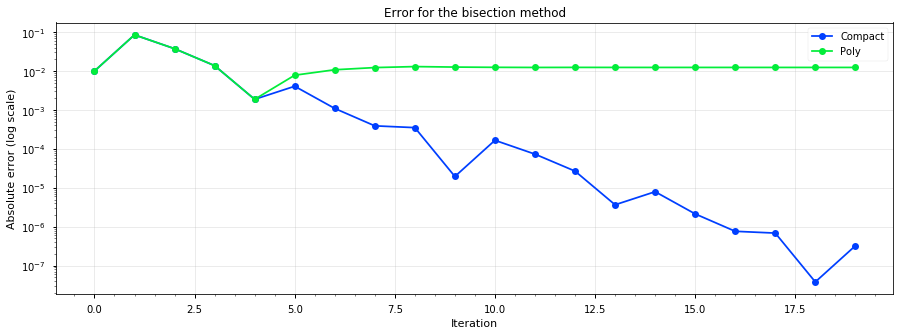

In [24]:
# Run with lower tolerance to get a more complete plot
root_compact, history_compact = bisection(compact, (4.82, 5.2), tol=1e-16, max_iter=20)
root_poly, history_poly = bisection(poly, (4.82, 5.2), tol=1e-16, max_iter=20)
# Plot absolute error
true_answer = 5
fig, ax = plt.subplots()
plt.plot(abs(np.array(history_compact) - true_answer) ,'o-')
plt.plot(abs(np.array(history_poly) - true_answer) ,'o-')
ax.set_yscale('log')
ax.grid(alpha=0.25)
ax.minorticks_on()
ax.set_ylabel("Absolute error (log scale)");
ax.set_xlabel("Iteration");
ax.set_title("Error for the bisection method");

_ = plt.legend(["Compact", "Poly"])

What is going on: It seems that, due to the lack of precision of the fully expanded polynomial version, the accuracy is no longer decreasing, so it has gotten "stuck", and cannot improve the guess.

# Problem 4

In [8]:
np.shape(np.array([1])) == ()

False

In [9]:
def tent(mu, x):
    if np.shape(x) == ():
        # single value
        min_func = min
    else:
        # list, do elementwise
        min_func = np.minimum
    return mu * min_func(x, 1-x)

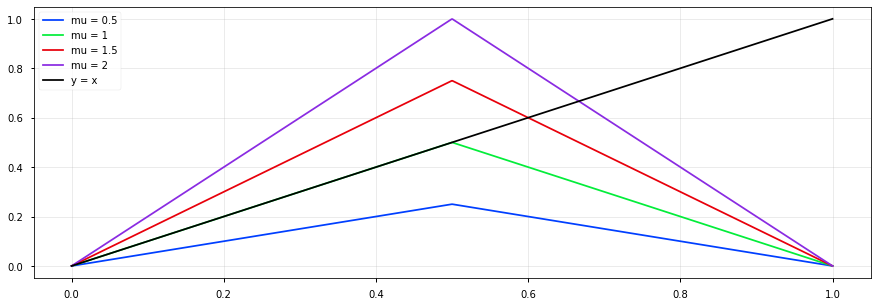

In [25]:
x = np.linspace(0,1, 1000)
plt.plot(x, tent(0.5, x))
plt.plot(x, tent(1, x))
plt.plot(x, tent(1.5, x))
plt.plot(x, tent(2, x))
plt.plot(x, x, 'k')
plt.grid(alpha=0.25)
_ = plt.legend(["mu = 0.5", "mu = 1", "mu = 1.5", "mu = 2", "y = x"])

In [11]:
def tent_fixed_point(mu, x0, maxiter=100, tol=1e-8):
    error = np.inf
    curr_iter = 0
    xs = []
    while(error > tol and curr_iter < maxiter):
        # iterate
        x = tent(mu, x0)
        error = np.linalg.norm(x0 - x)
        # append to history
        xs.append(x)
        curr_iter += 1
        x0 = x
    return x, xs

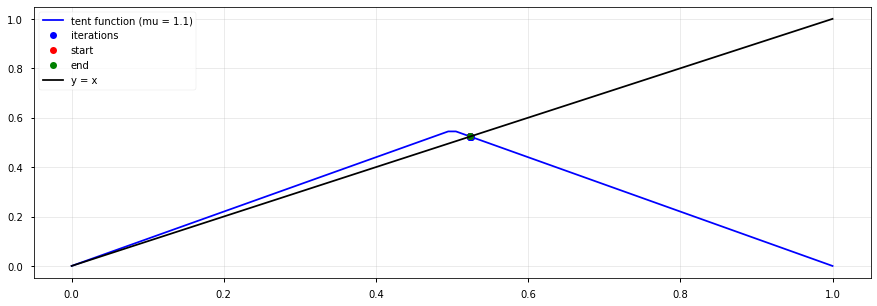

In [26]:
x_start = np.pi/6
mu = 1.1
xf, x_history = tent_fixed_point(mu, x_start, maxiter=10)
x_history = np.array(x_history)
x = np.linspace(0,1,100)
y = tent(mu, x)
plt.plot(x, y, 'b')
plt.plot(x_history, tent(mu, x_history), 'bo')
plt.plot(x_start, tent(mu, x_start), 'ro')
plt.plot(xf, tent(mu, xf), 'go')
plt.plot(x,x,'k')
plt.grid(alpha=0.25)
_ = plt.legend(["tent function (mu = %s)"%mu, "iterations", "start", "end", "y = x"])

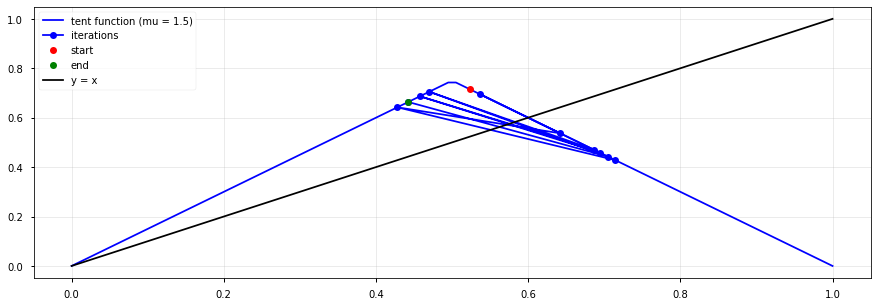

In [27]:
x_start = np.pi/6
mu = 1.5
xf, x_history = tent_fixed_point(mu, x_start, maxiter=10)
x_history = np.array(x_history)
x = np.linspace(0,1,100)
y = tent(mu, x)
plt.plot(x, y, 'b')
plt.plot(x_history, tent(mu, x_history), '-bo')
plt.plot(x_start, tent(mu, x_start), 'ro')
plt.plot(xf, tent(mu, xf), 'go')
plt.plot(x,x,'k')
plt.grid(alpha=0.25)
_ = plt.legend(["tent function (mu = %s)"%mu, "iterations", "start", "end", "y = x"])

Text(0, 0.5, 'count')

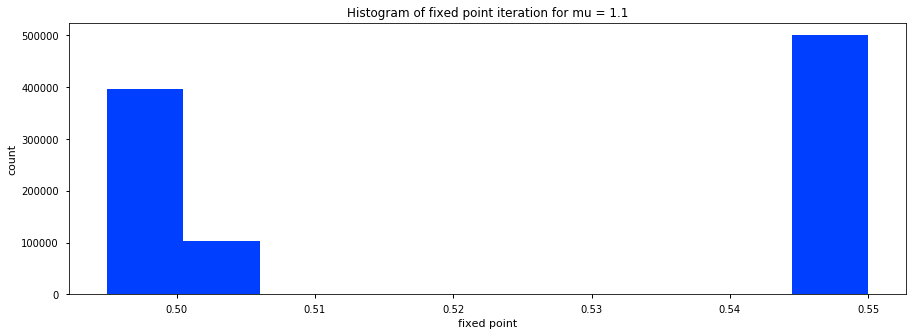

In [28]:
x_start = np.pi/6
mu = 1.1
xf, x_history = tent_fixed_point(mu, x_start, maxiter=10**6)
plt.hist(x_history)
plt.title("Histogram of fixed point iteration for mu = %s"%mu)
plt.xlabel("fixed point")
plt.ylabel("count")

Text(0, 0.5, 'count')

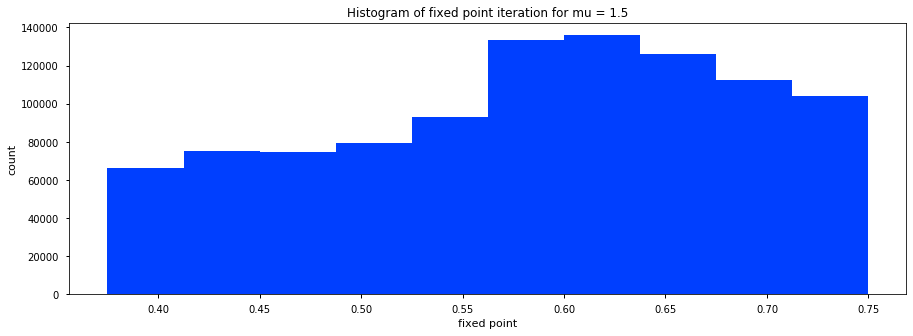

In [29]:
x_start = np.pi/6
mu = 1.5
xf, x_history = tent_fixed_point(mu, x_start, maxiter=10**6)
plt.hist(x_history)
plt.title("Histogram of fixed point iteration for mu = %s"%mu)
plt.xlabel("fixed point")
plt.ylabel("count")